# Import library

In [77]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [78]:
import torch
from torchvision import transforms
from torchvision import models
from PIL import Image
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add padiding for image

In [79]:
# Load image
path = '/content/drive/MyDrive/EE3063/HW8/image/'
file_name = os.listdir(path)
images = [Image.open(path + name) for name in file_name]
print(len(images))

19


In [80]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [81]:
for i, name in enumerate(file_name):
  im_new = expand2square(images[i], (0, 0, 0))
  im_new.save('/content/drive/MyDrive/EE3063/HW8/image/' + name, quality=95)

# Get image and label

In [82]:
# Load image
path = '/content/drive/MyDrive/EE3063/HW8/image/'
file_name = os.listdir(path)
images = [Image.open(path + name) for name in file_name]
print(len(images))

19


In [83]:
#Get labels
labels = [name.split(name[-7])[0] for name in file_name]
print(labels)

['great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl', 'great grey owl']


# Prepare data

In [84]:
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [85]:
transform_imgs = torch.empty(0, 3, 224, 224)
for img in images:
  tf_img = preprocess(img)
  tensor_img = torch.unsqueeze(tf_img, 0)
  transform_imgs = torch.cat((transform_imgs, tensor_img), dim = 0)

print(transform_imgs.shape)

torch.Size([19, 3, 224, 224])


# Load model

## Alexnet

In [86]:
alexnet = models.alexnet(pretrained=True)
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Resnet18

In [87]:
resnet18 = models.resnet18(pretrained=True)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Googlenet

In [88]:
googlenet = models.googlenet(pretrained=True)
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

# Evaluation

## Alexnet

In [92]:
model = alexnet
model.eval()

predictions = model(transform_imgs)

In [93]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
output = torch.nn.functional.softmax(predictions, dim=-1)

In [94]:
# Read the categories
with open("/content/drive/MyDrive/EE3063/HW7/imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [95]:
# Show top categories per image
top1_prob, top1_id = torch.topk(output, 1)
true = 0

for i in range(top1_id.shape[0]):
  if categories[top1_id[i][0]].startswith(labels[i]):
    true += 1

print('Accuracy: %.2f' %(100*(true/top1_id.shape[0])))

Accuracy: 63.16


## Resnet18

In [98]:
model = resnet18
model.eval()

predictions = model(transform_imgs)

In [99]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
output = torch.nn.functional.softmax(predictions, dim=-1)

In [100]:
# Show top categories per image
top1_prob, top1_id = torch.topk(output, 1)
true = 0

for i in range(top1_id.shape[0]):
  if categories[top1_id[i][0]].startswith(labels[i]):
    true += 1

print('Accuracy: %.2f' %(100*(true/top1_id.shape[0])))

Accuracy: 73.68


## Googlenet

In [102]:
model = googlenet
model.eval()

predictions = model(transform_imgs)

In [103]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
output = torch.nn.functional.softmax(predictions, dim=-1)

In [104]:
# Show top categories per image
top1_prob, top1_id = torch.topk(output, 1)
true = 0

for i in range(top1_id.shape[0]):
  if categories[top1_id[i][0]].startswith(labels[i]):
    true += 1

print('Accuracy: %.2f' %(100*(true/top1_id.shape[0])))

Accuracy: 73.68


# Plot result

In [ ]:
# View top 5 class for each image
for i in range(19):
  print('Image %s' %(file_name[i]))
  print(' %s   with accuracy is %.4f' %(categories[top1_id[i]], top1_prob[i]))

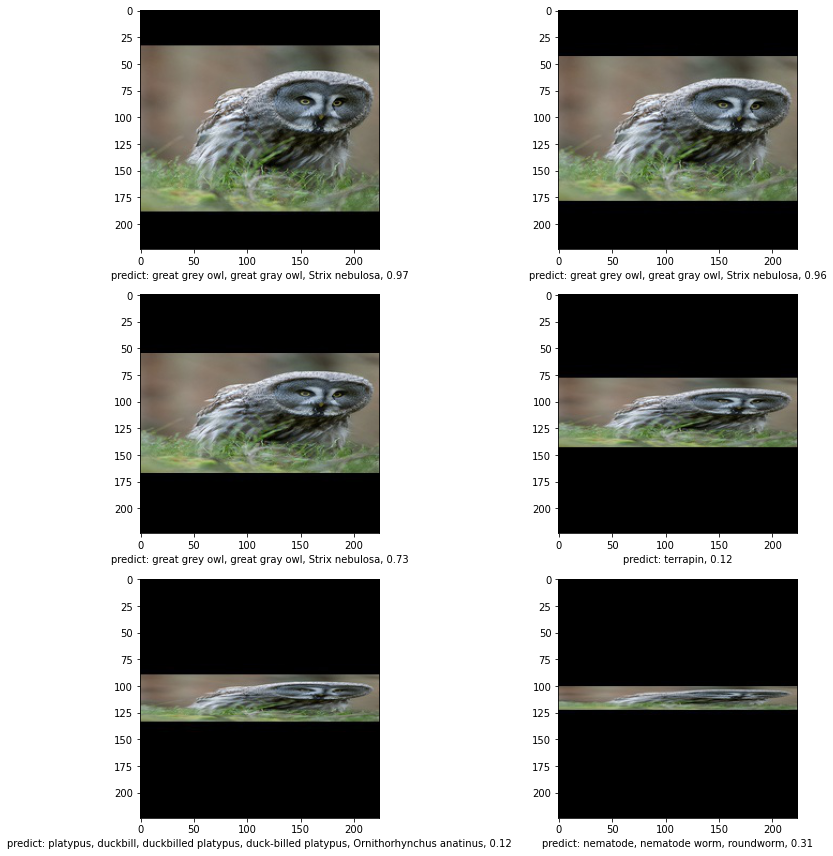

In [73]:
plt.figure(figsize=(12, 12))
value = [2, 3, 4, 6, 7, 8]
#value = [11, 12, 10, 14,   15, 16]
for i in value:
  name = file_name[i]
  img = Image.open(path +  file_name[i])
  plt.subplot(3, 2, value.index(i)+1)
  plt.imshow(img)
  plt.xlabel('predict: %s, %.2f' %(categories[top1_id[i]], top1_prob[i]))
plt.tight_layout()
plt.show()